In [1]:
import pandas as pd
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt 

import sys, os
parent_dir = os.getcwd()
path = os.path.dirname(parent_dir)
sys.path.append(path)

In [20]:
def process_data(timestamp, algo):
    input_path = f"experiments/logs/Homer_SimpleEnv/{algo}/{ts}/"
    device_pth = "/home/ds1/w210/home-energy-optimizer/"+"data/debug/device_list.csv"
    devices = pd.read_csv(device_pth)["device_id"].tolist()
    cols = [
        'device_id',
        'no_solar_cumulative_reward', 
        'no_battery_cumulative_reward',
        'sq_cumulative_reward',
        'cumulative_reward',
    ]
    df_list = []
    for device in devices:
        df = pd.read_csv("/home/ds1/w210/home-energy-optimizer/"
                    +input_path+f"{device}_results_array.csv")
        df_list.append(df[cols].tail(1).copy())
    combined_df = pd.concat(df_list)    

    cols2=['no_solar_cumulative_reward','no_battery_cumulative_reward','sq_cumulative_reward','cumulative_reward']
    labels = ['No Solar','Solar Only','Solar and Battery',f'HOMER - {algo.upper()}']
    agg_df = (combined_df[cols2].agg(['mean', 'std']))

    return combined_df, agg_df, labels, cols2

In [21]:
ts = "221129-205149"
algo =  'sac'

df, agg_df, labels, cols2 = process_data(ts, algo)
agg_df

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-574.319837,-191.881549,-28.199398,-141.687006
std,589.692851,360.016091,280.149703,335.756558


[Text(1, 0, 'No Solar'),
 Text(2, 0, 'Solar Only'),
 Text(3, 0, 'Solar and Battery'),
 Text(4, 0, 'HOMER - SAC')]

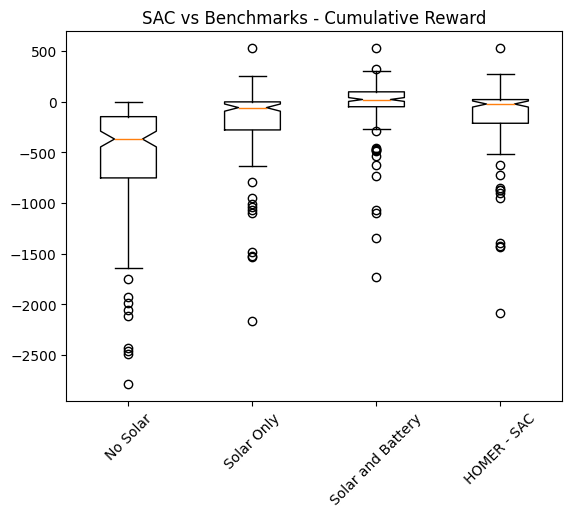

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title(f'{algo.upper()} vs Benchmarks - Cumulative Reward')
ax1.boxplot(df[cols2], notch = True)
ax1.set_xticklabels(labels=labels, rotation = 45)

Text(0.5, 1.0, 'Net Gain by device')

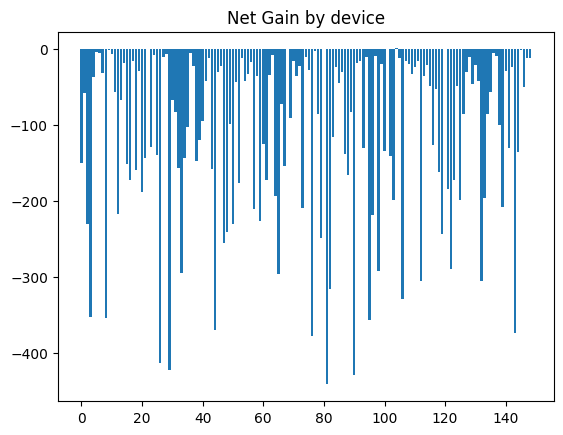

In [7]:
plt.bar(
    x=range(len(devices)), 
    height = combined_df['cumulative_reward'] - combined_df['sq_cumulative_reward']
)
plt.title('Net Gain by device')

In [23]:
df

,Datetime,Timestamp,time_x,time_y,weekday,month_x,month_y,region_1,region_2,region_3,...,tick,cumulative_reward,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,sq_soc,sq_net,sq_updated_action,sq_bat_output,device_id
0,1.642222e+18,1.642222e+09,-0.518773,-0.854912,1.0,0.866025,0.500000,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,-0.31331,0.0,0.0,EDB55CC1AF417
1,1.642223e+18,1.642223e+09,-0.500000,-0.866025,1.0,0.866025,0.500000,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,1.0,-0.31040,0.0,0.0,EDB55CC1AF417
2,1.642223e+18,1.642223e+09,-0.480989,-0.876727,1.0,0.866025,0.500000,0.0,0.0,0.0,...,2,0.0,0.0,0.0,0.0,1.0,-0.30768,0.0,0.0,EDB55CC1AF417
3,1.642223e+18,1.642223e+09,-0.461749,-0.887011,1.0,0.866025,0.500000,0.0,0.0,0.0,...,3,0.0,0.0,0.0,0.0,1.0,-0.30615,0.0,0.0,EDB55CC1AF417
4,1.642224e+18,1.642224e+09,-0.442289,-0.896873,1.0,0.866025,0.500000,0.0,0.0,0.0,...,4,0.0,0.0,0.0,0.0,1.0,-0.29733,0.0,0.0,EDB55CC1AF417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,1.644813e+18,1.644813e+09,-0.608761,-0.793353,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8635,0.0,0.0,0.0,0.0,1.0,-0.32441,0.0,0.0,EDB55CC1AF417
8636,1.644813e+18,1.644813e+09,-0.591310,-0.806445,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8636,0.0,0.0,0.0,0.0,1.0,-0.34198,0.0,0.0,EDB55CC1AF417
8637,1.644814e+18,1.644814e+09,-0.573576,-0.819152,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8637,0.0,0.0,0.0,0.0,1.0,-0.37108,0.0,0.0,EDB55CC1AF417
8638,1.644814e+18,1.644814e+09,-0.555570,-0.831470,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8638,0.0,0.0,0.0,0.0,1.0,-0.36850,0.0,0.0,EDB55CC1AF417
